## Exercise 3 - Find the closest point to a curve 

---

```python
Auther = 'Yubo Cai'
Email = 'yubo.cai@polytechnique.edu'
```

### Exercise 3.1

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

1. Suppose that $A$ is not a point on $\gamma$. Prove that if $\gamma$ is of class $C^1$ and $M_0$ is the point which realizes the minimal distance $A M_\theta$ then $A M_0$ is a normal vector to the curve $\gamma$
</div>


To prove that $A M_0$ is a normal vector to the curve $\gamma$ at the point $M_0$, we need to show that the vector $A M_0$ is orthogonal to the tangent vector of the curve at the point $M_0$.

Let $\gamma(\theta)=(x(\theta), y(\theta))$ be the parameterization of the curve $\gamma$. Let $T(\theta)$ be the unit tangent vector to the curve $\gamma$ at the point $\gamma(\theta)$ and let $N(\theta)$ be the unit normal vector to the curve $\gamma$ at the point $\gamma(\theta)$. 

Then we have $A M_\theta=\|\gamma(\theta)-A\|$ and $A M_0=\|\gamma(0)-A\|$ where $\gamma(\theta_0)=M_0$ is the point on $\gamma$ that realizes the minimal distance $A M_\theta$.

Since $A M_0$ is minimal, we have $\frac{d}{d\theta}\left(A M_\theta\right)=0$ at $\theta=\theta_0$, which implies that $\frac{d}{d\theta}(\|\gamma(\theta)-A\|^2)=0$ at $\theta=\theta_0$. Using the chain rule, we have:

$$
\frac{d}{d \theta}\left(\|\gamma(\theta)-A\|^2\right)=2(\gamma(\theta)-A) \cdot \gamma^{\prime}(\theta)
$$
Setting $\theta=\theta_0$, we get:
$$
\left(\gamma\left(\theta_0\right)-A\right) \cdot \gamma^{\prime}\left(\theta_0\right)=0
$$
This means that $A M_0$ is orthogonal to the tangent vector $T(\theta_0)$ at the point $\gamma(\theta_0)$, i.e., $A M_0$ is a normal vector to the curve $\gamma$ at the point $M_0=\gamma(\theta_0)$.

### Exercise 3.2

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

2. Note the minimization of $A M_\theta$ or $A M_\theta^2$ gives the same minimizer. If $\gamma(\theta)=$ $(x(\theta), y(\theta))$ and $A$ has coordinates $(a, b)$ give a formula for $A M_\theta^2$ and for the derivative $\frac{d}{d \theta}\left(A M_\theta^2\right)$.

</div>

The square of the distance between $A$ and $M_\theta$ is given by:
$$
\begin{align*}
AM_\theta^2 &= \left|\left| \gamma(\theta) - A \right|\right|^2 \\
&= \left(x(\theta) - a\right)^2 + \left(y(\theta) - b\right)^2
\end{align*}
$$
The derivative of $AM_\theta^2$ with respect to $\theta$ is:
$$
\begin{align*}
\frac{d}{d\theta}\left(AM_\theta^2\right) &= \frac{d}{d\theta}\left[\left(x(\theta) - a\right)^2 + \left(y(\theta) - b\right)^2\right] \\
&= 2\left(x(\theta) - a\right)\frac{dx}{d\theta} + 2\left(y(\theta) - b\right)\frac{dy}{d\theta}
\end{align*}
$$

### Exercise 3.2

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

3. Implement a numerical algorithm which can search for the point realizing the minimal distance using one of the methods in the previous two exercises. Verify numerically that the minimizer verifies the optimality conditions.

</div>

In [14]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


def gamma(theta, fun_x, fun_y):
    return fun_x(theta), fun_y(theta)


def distance(A, theta, gamma):
    # compute the distance between A and gamma(theta)
    x = gamma(theta, fun_x, fun_y)[0]
    y = gamma(theta, fun_x, fun_y)[1]
    return np.sqrt((x - A[0])**2 + (y - A[1])**2)


def gradient_descent(A,
                     gamma,
                     fun_x,
                     fun_y,
                     fun_x_deriv,
                     fun_y_deriv,
                     alpha=0.001,
                     tol=1e-8,
                     max_iter=10000):
    # initialize theta
    theta = np.random.uniform(0, 2 * np.pi)
    # iterate until convergence or max number of iterations
    for i in range(max_iter):
        # compute the gradient of the objective function
        x = gamma(theta, fun_x, fun_y)[0]
        y = gamma(theta, fun_x, fun_y)[1]
        x_prime = fun_x_deriv(theta)
        y_prime = fun_y_deriv(theta)
        grad = 2 * (x - A[0]) * x_prime + 2 * (y - A[1]) * y_prime
        # update theta
        theta_new = theta - alpha * grad
        # check for convergence
        if abs(theta_new - theta) < tol:
            break
        # update theta
        theta = theta_new
    # return the optimal value of theta and the distance to A
    return theta, distance(A, theta, gamma)


theta = 1.264329995620804
distance = 0.6615337657983956


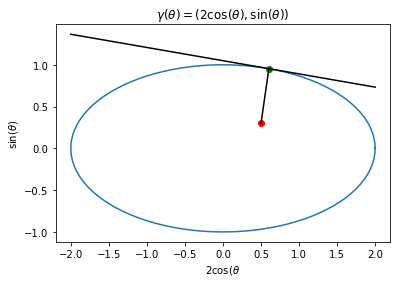

In [22]:
# test case 1
def fun_x(theta):
    return 2 * np.cos(theta)


def fun_y(theta):
    return np.sin(theta)


def fun_x_deriv(theta):
    return -2 * np.sin(theta)


def fun_y_deriv(theta):
    return np.cos(theta)


# plot the graph of (x, y) = gamma(theta)
A = np.array([0.5, 0.3])
theta = np.linspace(0, 2 * np.pi, 100)
x = fun_x(theta)
y = fun_y(theta)
plt.title(r'$\gamma(\theta) = (2 \cos(\theta), \sin(\theta))$')
plt.xlabel(r'$2 \cos(\theta)$')
plt.ylabel(r'$\sin(\theta)$')
plt.plot(x, y)

theta, dist = gradient_descent(A, gamma, fun_x, fun_y, fun_x_deriv,
                               fun_y_deriv)
print('theta =', theta)
print('distance =', dist)

# plot the optimal point for the distance
plt.scatter(A[0], A[1], color='red')
M = np.array([fun_x(theta), fun_y(theta)])
plt.scatter(M[0], M[1], color='green')
plt.plot([A[0], M[0]], [A[1], M[1]], color='black')

# plot the tangent line at the optimal point
x = np.linspace(-2, 2, 100)
y = fun_y_deriv(theta) * (x - fun_x(theta)) / fun_x_deriv(theta) + fun_y(theta)
plt.plot(x, y, color='black')


theta = 2.6926598539264632
distance = 0.3538433841996222
[-0.84087514  0.40508279]


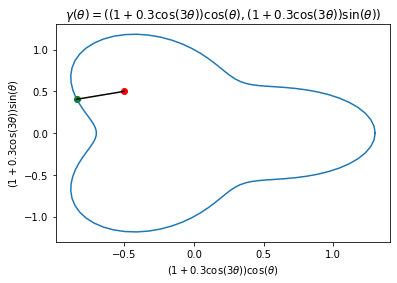

In [26]:
# test case 2
def fun_x(theta):
    return (1 + 0.3 * np.cos(3 * theta)) * np.cos(theta)


def fun_y(theta):
    return (1 + 0.3 * np.cos(3 * theta)) * np.sin(theta)


def fun_x_deriv(theta):
    return -3 * 0.3 * np.sin(3 * theta) * np.cos(theta) - (
        1 + 0.3 * np.cos(3 * theta)) * np.sin(theta)


def fun_y_deriv(theta):
    return -3 * 0.3 * np.sin(3 * theta) * np.sin(theta) + (
        1 + 0.3 * np.cos(3 * theta)) * np.cos(theta)


# plot the graph of (x, y) = gamma(theta)
A = np.array([-0.5, 0.5])
theta = np.linspace(0, 2 * np.pi, 100)
x = fun_x(theta)
y = fun_y(theta)
plt.title(r'$\gamma(\theta) = ((1 + 0.3 \cos(3 \theta)) \cos(\theta), (1 + 0.3 \cos(3 \theta)) \sin(\theta))$')
plt.xlabel(r'$(1 + 0.3 \cos(3 \theta)) \cos(\theta)$')
plt.ylabel(r'$(1 + 0.3 \cos(3 \theta)) \sin(\theta)$')
plt.plot(x, y)

theta, dist = gradient_descent(A, gamma, fun_x, fun_y, fun_x_deriv,
                               fun_y_deriv)
print('theta =', theta)
print('distance =', dist)

# plot the optimal point for the distance
plt.scatter(A[0], A[1], color='red')
M = np.array([fun_x(theta), fun_y(theta)])
print(M)
plt.scatter(M[0], M[1], color='green')
plt.plot([A[0], M[0]], [A[1], M[1]], color='black')

plt.show()

theta = 5.542329112835082
distance = 3.4463918549397543
[ 4.08963459 -3.74062842]


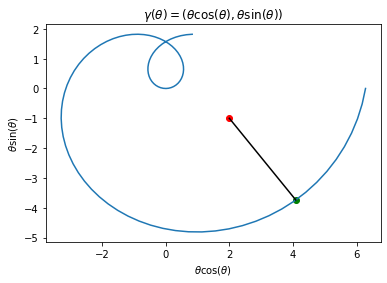

In [27]:
# test case 2
def fun_x(theta):
    return theta * np.cos(theta)


def fun_y(theta):
    return theta * np.sin(theta)


def fun_x_deriv(theta):
    return np.cos(theta) - theta * np.sin(theta)


def fun_y_deriv(theta):
    return np.sin(theta) + theta * np.cos(theta)


# plot the graph of (x, y) = gamma(theta)
A = np.array([2, -1])
theta = np.linspace(-2, 2 * np.pi, 100)
x = fun_x(theta)
y = fun_y(theta)
plt.title(r'$\gamma(\theta) = (\theta \cos(\theta), \theta \sin(\theta))$')
plt.xlabel(r'$\theta \cos(\theta)$')
plt.ylabel(r'$\theta \sin(\theta)$')
plt.plot(x, y)

theta, dist = gradient_descent(A, gamma, fun_x, fun_y, fun_x_deriv,
                               fun_y_deriv)
print('theta =', theta)
print('distance =', dist)

# plot the optimal point for the distance
plt.scatter(A[0], A[1], color='red')
M = np.array([fun_x(theta), fun_y(theta)])
print(M)
plt.scatter(M[0], M[1], color='green')
plt.plot([A[0], M[0]], [A[1], M[1]], color='black')

plt.show()